#Лабораторная работа №2
#Решение обыкновенных дифференциальных уравнений
Выполнил: Гапанович А. В. (4 группа), Вариант 1.


Для решения дана следующая задача:
$${\begin{equation*}
 \begin{cases}
   U'=1-U\\
   U(0) = U_{0} = 0\\
 \end{cases}
 \end{equation*}}$$
Цели:

*   Получить точное решение и постоить его зависимость.
*   Решить задачу методом Адамса-Башфорта-Моултона 4-го порядка. 
*   Решить задачу методом Гира второго порядка.



#1. Аналитическое решение

Решение данной задачи имеет следующий вид:
$$U(t)=(U_{0}-1) exp(-t)+1$$

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import math


In [6]:
u_0 = 0  #начальное U(0)
len_u_0 = 1
time_sum  = 10

tau_control = 0.01
tau_1 = 0.5
tau_2 = 0.4
tau_3 = 0.1

t = list()
u = list()

In [7]:
def function(t, u):
  return float(1 - u)

def function_solve(t, i):
  return (u_0 - 1) * math.exp(-t[i]) + 1

def fun_analytical(u_0, time_sum, tau):
  time_numbers = int(time_sum // tau)
  t = np.linspace(0, time_numbers * tau, time_numbers + 1)
  u = np.zeros((time_numbers + 1, len_u_0))
  for i in range(time_numbers + 1):
    u[i] = function_solve(t, i)
  return list(u), list(t)

In [8]:
def draw_fun_analytical():
  u_control, t_control = fun_analytical(u_0, time_sum, tau_control)
  plt.plot(t_control, u_control)
  plt.title(' Аналитическое решение, tau = 0.01')
  plt.ylabel('u(t)')
  plt.xlabel('t')
  plt.grid(True)

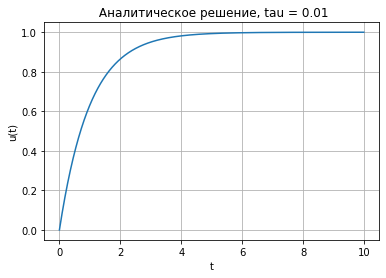

In [9]:
draw_fun_analytical()

# 2. Методы Адамса
Для решения дифференциальных уравнений методом Адамса существует  два подхода, из которых вытекает два типа формул:
*   Экстраполяционные (метод Адамса-Башфорта) 
*   Интерполяционные (метод Адамса-Мултона)


#2.1 Метод Адамса-Башфорта 
$${
\begin{matrix}
 Порядок\:метода& Формула\\ 
 1& y_{n + 1} = y_n + \tau F(t_n, y_n)\\ 
 2& y_{n + 2} = y_{n + 1} + \tau \left (\frac{3}{2}F(t_{n + 1}, y_{n + 1}) - \frac{1}{2}F(t_{n}, y_{n})\right )\\ 
 3& y_{n + 3} = y_{n + 2} + \tau \left (\frac{23}{12}F(t_{n + 2}, y_{n + 2}) - \frac{4}{3}F(t_{n + 1}, y_{n + 1}) + \frac{5}{12}F(t_{n}, y_{n})\right )\\ 
 4& y_{n + 4} = y_{n + 3} + \tau \left (\frac{55}{24}F(t_{n + 3}, y_{n + 3}) - \frac{59}{24}F(t_{n + 2}, y_{n + 2}) + \frac{37}{24}F(t_{n + 1}, y_{n + 1}) - \frac{3}{8}F(t_{n}, y_{n})\right )\\
 5& y_{n + 5} = y_{n + 4} + \tau \left (\frac{1901}{720}F(t_{n + 4}, y_{n + 4}) - \frac{1387}{360}F(t_{n + 3}, y_{n + 3}) + \frac{109}{30}F(t_{n + 2}, y_{n + 2}) - \frac{637}{360}F(t_{n + 1}, y_{n + 1}) + \frac{251}{720}F(t_{n}, y_{n})\right )
\end{matrix}}$$


In [10]:
def Adams_Bashfort_fourth_order_method(function, u_0, time_sum, tau):
    time_numbers = int(time_sum // tau)
    solve = lambda t, u: np.asarray(function(t, u))
    t = np.linspace(0, time_numbers * tau, time_numbers + 1)
    u = np.zeros((time_numbers + 1, len_u_0))
    u[0] = u_0
    for i in range(4 - 1):
        k1 = solve(t[i], u[i])
        k2 = solve(t[i] + tau / 2, u[i] + tau * k1  / 2)
        k3 = solve(t[i] + tau / 2, u[i] + tau * k2  / 2)
        k4 = solve(t[i] + tau, u[i] + tau * k3)
        u[i + 1] = u[i] + tau * (k1 + 2 * k2 + 2 * k3 + k4) / 6   
    for i in range(time_numbers - 3):
        u[i + 4] = u[i + 3] + tau * ((55/24 * solve(t[i + 3], u[i + 3])) - 
                                     (59/24 * solve(t[i + 2], u[i + 2])) + 
                                     (37/24 * solve(t[i + 1], u[i + 1])) - 
                                     (3/8 * solve(t[i], u[i])))
    return u, t

In [11]:
def draw_Adams_Bashfort_fourth_order_method():
  u_control, t_control = fun_analytical(u_0, time_sum, tau_control)
  u_1, t_1 = Adams_Bashfort_fourth_order_method(function, u_0, time_sum, tau_1)
  u_2, t_2 = Adams_Bashfort_fourth_order_method(function, u_0, time_sum, tau_2)
  u_3, t_3 = Adams_Bashfort_fourth_order_method(function, u_0, time_sum, tau_3)
  fg = plt.figure(figsize=(11, 6), constrained_layout=True)
  gs = fg.add_gridspec(3, 2)
  fig_ax_1 = fg.add_subplot(gs[1, 0])
  plt.title('Метод Адамса-Башфорта, tau = 0.5')
  plt.ylabel('u(t)')
  plt.xlabel('t')
  plt.grid(True)
  plt.plot(t_1, u_1)
  fig_ax_2 = fg.add_subplot(gs[1, 1])
  plt.title('Метод Адамса-Башфорта, tau = 0.4')
  plt.ylabel('u(t)')
  plt.xlabel('t')
  plt.grid(True)
  plt.plot(t_2, u_2)
  fig_ax_3 = fg.add_subplot(gs[2, 0])
  plt.title('Метод Адамса-Башфорта, tau = 0.1')
  plt.ylabel('u(t)')
  plt.xlabel('t')
  plt.grid(True)
  plt.plot(t_3, u_3)
  fig_ax_4 = fg.add_subplot(gs[2, 1])
  plt.title('Аналитическое решение, tau = 0.01')
  plt.ylabel('u(t)')
  plt.xlabel('t')
  plt.grid(True)
  plt.plot(t_control, u_control)

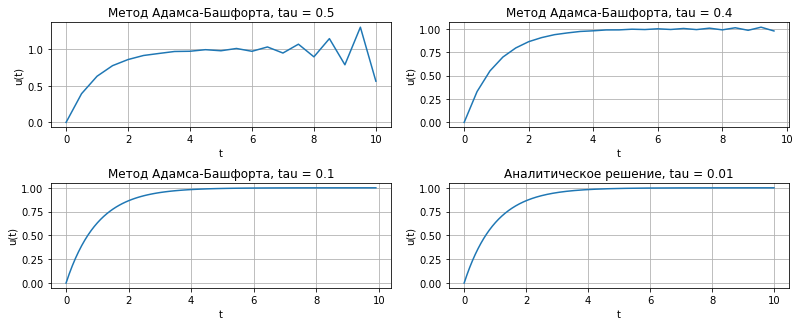

In [12]:
draw_Adams_Bashfort_fourth_order_method()

#2.2 Метод Адамса-Мултона
${
\begin{matrix}
 Порядок\:метода& Формула\\ 
 1& y_{n} = y_{n - 1} + \tau F(t_n, y_n)\\ 
 2& y_{n + 1} = y_{n} + \frac{\tau}{2} \left (F(t_{n + 1}, y_{n + 1}) + F(t_{n}, y_{n})\right )\\ 
 3& y_{n + 2} = y_{n + 1} + \tau \left (\frac{5}{12}F(t_{n + 2}, y_{n + 2}) + \frac{2}{3}F(t_{n + 1}, y_{n + 1}) - \frac{1}{12}F(t_{n}, y_{n})\right )\\ 
 4& y_{n + 3} = y_{n + 2} + \tau \left (\frac{3}{8}F(t_{n + 3}, y_{n + 3}) + \frac{19}{24}F(t_{n + 2}, y_{n + 2}) - \frac{5}{24}F(t_{n + 1}, y_{n + 1}) + \frac{1}{24}F(t_{n}, y_{n})\right )\\
 5& y_{n + 4} = y_{n + 3} + \tau \left (\frac{251}{720}F(t_{n + 4}, y_{n + 4}) + \frac{646}{720}F(t_{n + 3}, y_{n + 3}) - \frac{264}{720}F(t_{n + 2}, y_{n + 2}) + \frac{106}{720}F(t_{n + 1}, y_{n + 1}) - \frac{19}{720}F(t_{n}, y_{n})\right )
\end{matrix}}$

In [81]:
def Adams_Multon_fourth_order_method(function, u_0, time_sum, tau):
    time_numbers = int(time_sum // tau)
    solve = lambda t, u: np.asarray(function(t, u))
    t = np.linspace(0, time_numbers * tau, time_numbers + 1)
    u = np.zeros((time_numbers + 1, len_u_0))
    u[0] = u_0

    '''
    # проверял, как будет получаться решение, если вычислять первые
    #два значения через сам метод, не используя РК-4
    def func1(a, t, before_t, b):
      return a - b - tau * (1/2 * solve(t, a) + 1/2 * solve(before_t, b))
    u[1] = optimize.fsolve(func1, u[0], (t[1], t[0], u[0]))
    def func2(a, t, beforet_1, beforet_2, b, c):
      return a - b- tau * (5/12 * solve(t, a) +
                           2/3 * solve(beforet_1, b)
                           -1/12 * solve(beforet_2, c))
    u[2] = optimize.fsolve(func2, u[0], (t[2], t[1], t[0], u[1], u[0]))
    '''   
    for i in range(4 - 1):
      k1 = solve(t[i], u[i])
      k2 = solve(t[i] + tau / 2, u[i] + tau * k1  / 2)
      k3 = solve(t[i] + tau / 2, u[i] + tau * k2  / 2)
      k4 = solve(t[i] + tau, u[i] + tau * k3)
      u[i + 1] = u[i] + tau * (k1 + 2 * k2 + 2 * k3 + k4) / 6   
    def func(a, t, beforet_1, beforet_2, beforet_3, b, c, d):
      return a - b - tau * (3/8 * solve(t, a) + 
                            19/24 * solve(beforet_1, b) - 
                            5/24 * solve(beforet_2, c) + 
                            1/24 * solve(beforet_3, d))
    for i in range(time_numbers-2):
      u[i + 3] = optimize.fsolve(func, u[i], (t[i+3], t[i+2], t[i+1], t[i], u[i+2], u[i+1], u[i]))
    return u, t   

In [82]:
def draw_Adams_Multon_fourth_order_method():
  u_control, t_control = fun_analytical(u_0, time_sum, tau_control)
  u_1, t_1 = Adams_Multon_fourth_order_method(function, u_0, time_sum, tau_1)
  u_2, t_2 = Adams_Multon_fourth_order_method(function, u_0, time_sum, tau_2)
  u_3, t_3 = Adams_Multon_fourth_order_method(function, u_0, time_sum, tau_3)
  fg = plt.figure(figsize=(11, 6), constrained_layout=True)
  gs = fg.add_gridspec(3, 2)
  fig_ax_1 = fg.add_subplot(gs[1, 0])
  plt.title('Метод Адамса-Мултона, tau = 0.5')
  plt.ylabel('u(t)')
  plt.xlabel('t')
  plt.grid(True)
  plt.plot(t_1, u_1)
  fig_ax_2 = fg.add_subplot(gs[1, 1])
  plt.title('Метод Адамса-Мултона, tau = 0.3')
  plt.ylabel('u(t)')
  plt.xlabel('t')
  plt.grid(True)
  plt.plot(t_2, u_2)
  fig_ax_3 = fg.add_subplot(gs[2, 0])
  plt.title('Метод Адамса-Мултона, tau = 0.1')
  plt.ylabel('u(t)')
  plt.xlabel('t')
  plt.grid(True)
  plt.plot(t_3, u_3)
  fig_ax_4 = fg.add_subplot(gs[2, 1])
  plt.title('Аналитическое решение, tau = 0.01')
  plt.ylabel('u(t)')
  plt.xlabel('t')
  plt.grid(True)
  plt.plot(t_control, u_control)

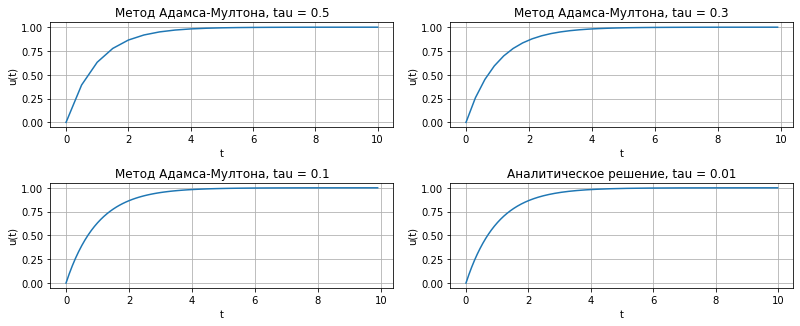

In [83]:
draw_Adams_Multon_fourth_order_method()

#3. Методы Гира
${
\begin{matrix}
 Порядок\:метода& Формула\\ 
 1& y^{n}-y^{n-1}=\tau F(t_{n},y^{n})\\ 
 2& 3y^{n}-4y^{n-1}+y^{n-2}=2\tau F(t_{n},y^{n})\\ 
 3& 11y^{n}-18y^{n-1}+9y^{n-2}-2y^{n-3}=6\tau F(t_{n},y^{n})\\ 
 4& 25y^{n}-48y^{n-1}+36y^{n-2}-16y^{n-3}+y^{n-4}=12\tau F(t_{n},y^{n})
\end{matrix}}$

In [84]:
def Gears_second_order_method(function, u_0, time_sum, tau):
    time_numbers = int(time_sum // tau)
    solve = lambda t, u: np.asarray(function(t, u))
    t = np.linspace(0, time_numbers * tau, time_numbers + 1)
    u = np.zeros((time_numbers + 1, len_u_0))
    u[0] = u_0
    for i in range(2 - 1):
        k1 = solve(t[i], u[i])
        k2 = solve(t[i] + tau / 2, u[i] + tau * k1  / 2)
        k3 = solve(t[i] + tau / 2, u[i] + tau * k2  / 2)
        k4 = solve(t[i] + tau, u[i] + tau * k3)
        u[i + 1] = u[i] + tau * (k1 + 2 * k2 + 2 * k3 + k4) / 6 
    def func(a, t, b, c):
        return 3 * a - 4 * b + c - 2 * tau *solve(t, a)
    for i in range(time_numbers - 1):
        u[i + 2] = optimize.fsolve(func, u[i + 1], (t[i + 2], u[i + 1], u[i]))
    return list(u), list(t)

In [85]:
def draw_Gears_second_order_method():
  u_control, t_control = fun_analytical(u_0, time_sum, tau_control)
  u_1, t_1 = Gears_second_order_method(function, u_0, time_sum, tau_1)
  u_2, t_2 = Gears_second_order_method(function, u_0, time_sum, tau_2)
  u_3, t_3 = Gears_second_order_method(function, u_0, time_sum, tau_3)
  fg = plt.figure(figsize=(11, 6), constrained_layout=True)
  gs = fg.add_gridspec(3, 2)
  fig_ax_1 = fg.add_subplot(gs[1, 0])
  plt.title('Метод Гира 2-го порядка, tau = 0.5')
  plt.ylabel('u(t)')
  plt.xlabel('t')
  plt.grid(True)
  plt.plot(t_1, u_1)
  fig_ax_2 = fg.add_subplot(gs[1, 1])
  plt.title('Метод Гира 2-го порядка, tau = 0.3')
  plt.ylabel('u(t)')
  plt.xlabel('t')
  plt.grid(True)
  plt.plot(t_2, u_2)
  fig_ax_3 = fg.add_subplot(gs[2, 0])
  plt.title('Метод Гира 2-го порядка, tau = 0.1')
  plt.ylabel('u(t)')
  plt.xlabel('t')
  plt.grid(True)
  plt.plot(t_3, u_3)
  fig_ax_4 = fg.add_subplot(gs[2, 1])
  plt.title('Аналитическое решение, tau = 0.01')
  plt.ylabel('u(t)')
  plt.xlabel('t')
  plt.grid(True)
  plt.plot(t_control, u_control)

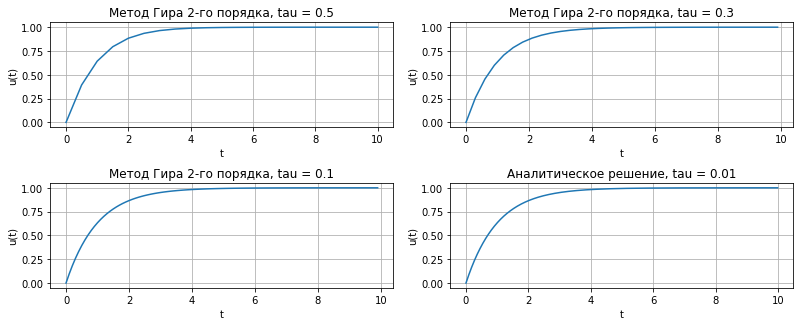

In [86]:
draw_Gears_second_order_method()